In [34]:
from math import *
import numpy as np
import random
from Agent import Agent
from Rewards import *
import matplotlib.pyplot as plt

In [35]:
Pmin = 0.0
Pmax_1 = 10.0
Pmax_2 = 100.0
Npower = 100
sigma2 = 1

actions_1 = np.linspace(Pmin, Pmax_1, Npower)
actions_2 = np.linspace(Pmin, Pmax_2, Npower)

states = np.array([0])

In [36]:
alpha = 0.5
gamma = 0.9
epsilon = 0.1
# QSize = actions.size * states.size
# half_size = (int) (0.5*QSize)
epsilon = 0.1*100

In [37]:
agents = []
PA_1 = Agent(states.size, actions_1.size)
PA_2 = Agent(states.size, actions_2.size)
agents.append(PA_1)
agents.append(PA_2)

In [38]:
#Channel conditions
g1 = 2.5
g2 = 1.5
Gamma = 3.532
sigma2 = 1
beta = 0.2
optimal = np.log2(1 + ((Pmax_1*g1)/((Pmax_2*g1*beta+1)*Gamma)))+np.log2(1+(Pmax_2*g2)/((Pmax_1*g2*beta+1)*Gamma))
optimal_1 = np.log2(1+(Pmax_1*g1)/((1)*Gamma))
optimal_2 = np.log2(1+(Pmax_2*g2)/((1)*Gamma))

In [39]:
Iterations = 50*max(actions_1.size,actions_2.size)
system_perf = np.zeros((1,Iterations))
for episode in np.arange(Iterations):

    # Choosing action
    sumQ = np.zeros((states.size, actions_1.size))
    for i in [0, 1]:
        PA = agents[i]
        sumQ += PA.Q

    powers = np.array([0,0])

    for i in [0, 1]:
        if i==0:
            actions = actions_1
        else:
            actions = actions_2
        PA = agents[i]
        if (episode/Iterations*100) < 80:
            rnd = random.randint(1,100)
            if rnd< epsilon:
                idx = random.randint(0,Npower-1)
                PA.set_power(actions[idx])
                PA.p_index = idx
            else:
                max_indice = np.argmax(PA.Q, axis = 1)
                idx = max_indice[PA.s_index]
                PA.p_index = idx
                PA.set_power(actions[idx])
        else:
            max_indice = np.argmax(PA.Q, axis=1)
            idx = max_indice[PA.s_index]
            PA.p_index = idx
            PA.set_power(actions[idx])
        powers[i] = PA.power
        agents[i] = PA

    # Calculate the Reward
    # Agent1
    PA_1 = agents[0]
    PA_2 = agents[1]
    
    signal = PA_1.power*g1
    interf = PA_2.power*g1*beta
    reward_1 = R_2(signal, interf, 1.0)
    
    act = PA_1.p_index
    st = PA_1.s_index
    PA_1.Q[st, act] = PA_1.Q[st, act] + alpha * (reward_1 - PA_1.Q[st, act])

    # Agent2
    signal = PA_2.power * g2
    interf = PA_1.power * g2 * beta
    reward_2 = R_2(signal, interf, 1.0)
    act = PA_2.p_index
    st = PA_2.s_index
    PA_2.Q[st, act] = PA_2.Q[st, act] + alpha * (reward_2 - PA_2.Q[st, act])

    system_perf[0,episode] = reward_1 + reward_2

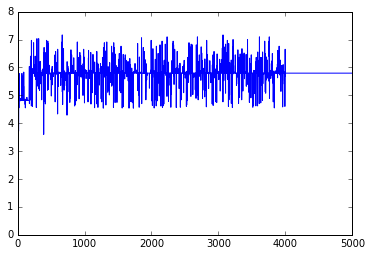

In [40]:
plt.plot(system_perf[0,:])
plt.show()

In [41]:
print(system_perf[0,Iterations-1])

5.794025732706048


In [42]:
print(optimal, optimal_1, optimal_2)

3.725690298782194 3.014023630574952 5.441910228311232


In [43]:
print(agents[0].power)

print(agents[1].power)

10.0
94.94949494949496


P =  [9.9]


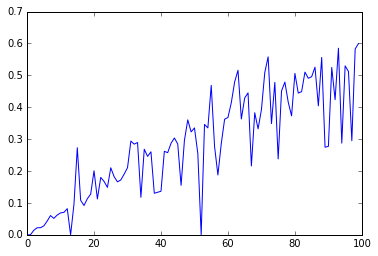

In [44]:
idx = np.argmax(agents[0].Q, axis=1)
print('P = ', Pmax_1*idx/100)
plt.plot(agents[0].Q[0,:])
plt.show()

P =  [94.]


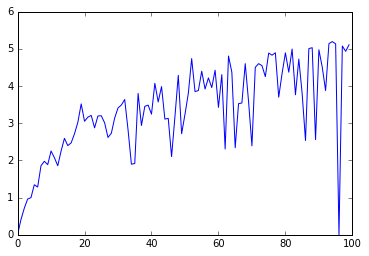

In [45]:
idx = np.argmax(agents[1].Q, axis=1)
print('P = ', Pmax_2*idx/100)
plt.plot(agents[1].Q[0,:])
plt.show()

P =  [940.]


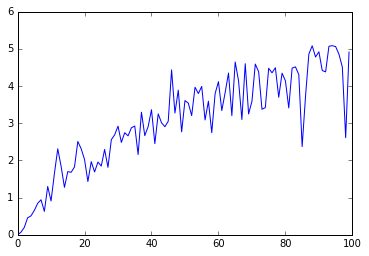

In [168]:
idx = np.argmax(sumQ, axis=1)
print('P = ', Pmax*idx/100)
plt.plot(sumQ[0,:])
plt.show()

In [169]:
max(2,3)

3